# Kernal PCA

Importing the dataset

In [2]:
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[, 3:5]
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


Splitting the dataset into the Training set and Test set

In [3]:
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.4.3"

Feature Scaling

In [4]:
training_set[, 1:2] = scale(training_set[, 1:2])
test_set[, 1:2] = scale(test_set[, 1:2])

Applying Kernel PCA

In [5]:
library(kernlab)
kpca = kpca(~., data = training_set[-3], kernel = 'rbfdot', features = 2)
training_set_pca = as.data.frame(predict(kpca, training_set))
training_set_pca$Purchased = training_set$Purchased
test_set_pca = as.data.frame(predict(kpca, test_set))
test_set_pca$Purchased = test_set$Purchased

Fitting Logistic Regression to the Training set

In [6]:
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set_pca)

Predicting the Test set results

In [7]:
prob_pred = predict(classifier, type = 'response', newdata = test_set_pca[-3])
y_pred = ifelse(prob_pred > 0.5, 1, 0)
y_pred

2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   1   0   1   1 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  1   0   1   1   1   0   1   1   1   1   1   0   1   1   1   0   1   0   0   0 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   1   1   1   1   1   0   1   0   1   1   0   0   0   1

Making the Confusion Matrix

In [8]:
cm = table(test_set_pca[, 3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 10 26

Visualising the Training set results

Warning message:
"package 'ElemStatLearn' was built under R version 3.4.3"

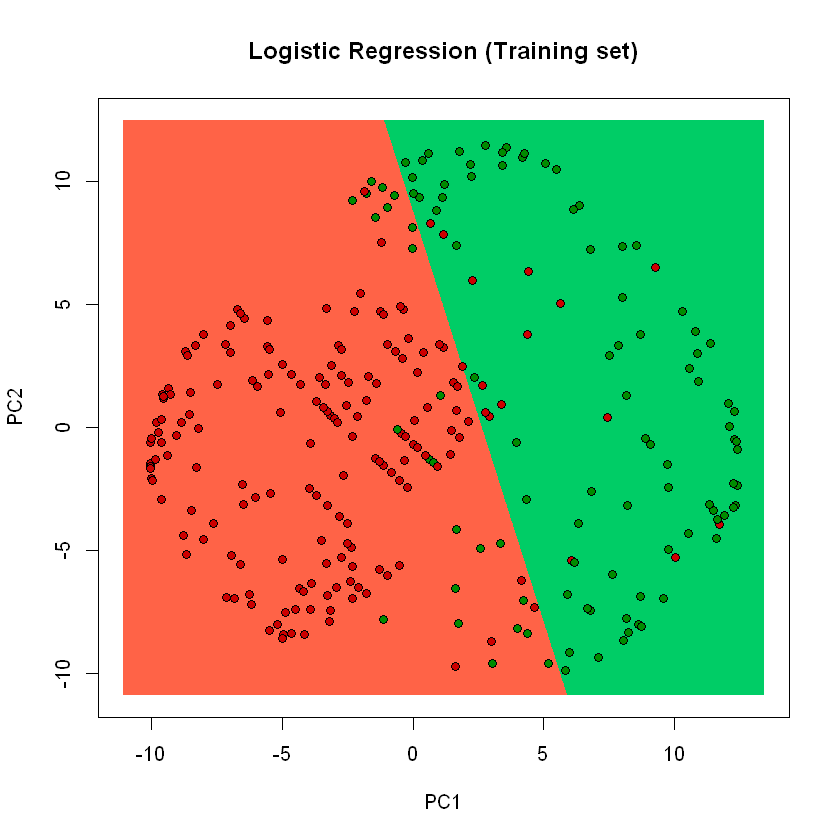

In [9]:
library(ElemStatLearn)
set = training_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))


Visualising the Test set results

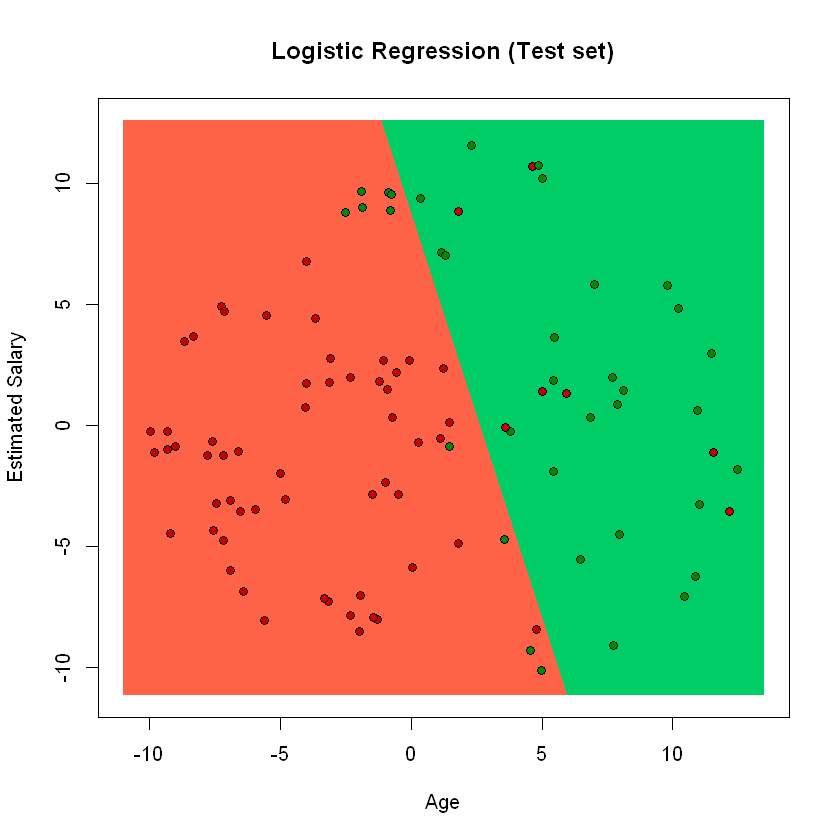

In [10]:
library(ElemStatLearn)
set = test_set_pca
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('V1', 'V2')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

We got an accuracy of 83% with Gaussian Kernal